# Lecture IV: Pointers and Arrays

A **pointer** is a variable that contains the **address of a variable**. Pointers are much used in C, partly ,because they are sometimes the only way to express a computation, and partly because they usually lead to more compact and efficient code than can be obtained in other ways. Pointers and arrays are closely related; this chapter also explores this relationship and shows how to exploit it.
*Pointers have been lumped with the goto statement as a marvelous way to create impossible-to-understand programs*. This is certainly true when they are used carelessly, and it is easy to create pointers that point somewhere unexpected.

With discipline, however, pointers can also be used to achieve clarity and simplicity. This is the aspect that we will try to illustrate.

The main change in ANSI C is to make explicit the rules about how pointers can be manipulated, in effect mandating what good programmers already practice and good compilers already enforce. In addition, the type void * (pointer to void) replaces char * as the proper type for a generic pointer.


# Pointers and Addresses

Let us begin with a simplified picture of how memory is organized. A typi-
cal machine has an array of consecutively numbered or addressed memory cells
that may bemanipulated individually or in contiguous groups. One common
situation is that any byte can be a char, a pair of one-byte cells can be treated
as a short integer, and four adjacent bytes form a long. A pointer is a group
of cells (often two or four) that can hold an address. So if c is a char and p is
a pointer that points to it, we could represent the situation this way:

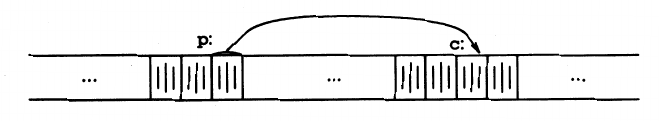

The unary operator &. gives the address of an object, so the statement

<code>
p = &c;
</code>

assigns the address of c to the variable p, and p is said to "point to" c. The &
operator only applies to objects in memory: variables and array elements. It
cannot be applied to expressions, constants, or register variables.
The unary operator * is the indirection or dereferencing operator; when
applied to a pointer, it accesses the object the pointer points to. Suppose that x
and yare integers and ip is a pointer to into This artificial sequence shows
how to declare a pointer and how to use & and * :

<code>
    int x = 1, y = 2, z[10];
    int *ip; /* ip is a pointer to int */
    ip = &x; /* ip now points to x */
    y = *ip; /* y is now 1 */
    *ip = 0; /* x is now 0 */
    ip = &z[O]; /* ip now points to x */
</code>

The unary operator & gives the address of an object, so the statement
<code>
    p = &c;
</code>

assigns the address of c to the variable p, and p is said to "point to" c. The &
operator only applies to objects in memory: variables and array elements. It
cannot be applied to expressions, constants, or register variables.
The unary operator * is the indirection or dereferencing operator; when
applied to a pointer, it accesses the object the pointer points to. Suppose that x
and yare integers and ip is a pointer to into This artificial sequence shows
how to declare a pointer and how to use & and * :

<code>
    int x = 1, y = 2, z[10];
    int *ip; /* ip is a pointer to int */
    ip = &x; /* ip now points to x */
    y = *ip; /* y is now 1 */
    *ip = 0; /* x is now 0 */
    ip = &z[O]; /* ip now points to z[O] */
</code> 

The declarations of x, y, and z are what we've seen all along. The declaration
of the pointer ip,
<code>
    int ip;
 </code>
 
 is intended as a mnemonic; it says that the expression 
<code>
    *ip
</code>
 is an int. 
 The syntax of the declaration for a variable mimics the syntax of expressions in which
the variable might appear. This reasoning applies to function declarations as
well. For example,
<code>
    double *dp, atof(char *);
</code>

says that in an expression <code> *dp </code> and <code>atof(s)</code> have values of type double, and
that the argument of atof is a pointer to char.

You should also note the implication that a pointer is constrained to point to
a particular kind of object: every pointer points to a specific data type. (There
is one exception: a "pointer to void" is used to hold any type of pointer but
cannot be dereferenced itself. We'll come back to it in Section 5.11.)
If ip points to the integer x, then <code>*ip</code> can occur in any context where x
could, so
<code>
    *ip = *ip + 10
</code>
increments <code>*ip</code>  by 10.
The unary operators * and & bind more tightly than arithmetic operators, so
the assignment
<code>
    y = *ip + 1
</code>
takes whatever ip points at, adds 1, and assigns the result to y, while
<code>
    *ip += 1
</code>
    increments what ip points to, as do
    <code>
    ++*ip
    </code>
    and
    <code>
    (*ip) ++
    </code>
    
The parentheses are necessary in this last example; without them, the expression
would increment ip instead of what it points to, because unary operators like *
and ++ associate right to left.
Finally, since pointers are variables, they can be used without dereferencing.
For example, if iq is another pointer to int,
</code>
    iq = ip
    </code>
copies the contents of ip into iq, thus making iq point to whatever ip pointed
to.   

# Pointers and Function Arguments

Since C passes arguments to functions by value, there is no direct way for
the called function to alter a variable in the calling function. For instance, a
sorting routine might exchange two out-of-order elements with a function called
swap. It is not enough to write
<code>
    swap(a,b)
    </code>
where the swap function is defined as
<code>
    void swap(int x, int y) /* WRONG */
    {
        int temp;
        temp = x;
        x = y;
        y = temp;
    }
    </code>
Because of call by value, swap can't affect the arguments a and b in the routine
that called it. The function above only swaps copies of a and b.
The way to obtain the desired effect is for the calling program to pass
pointers to the values to be changed:
<code>
    swap(&a, &b)
    </code>
Since the operator & produces the address of a variable, &a is a pointer to a. In
swap itself, the parameters are declared to be pointers, and the operands are
accessed indirectly through them.

<code>
    void swap(int *px, int *py) /* interchange *px and *py */
    {
        int temp;
        temp = *px;
        *px = *py;
        *py = temp;
    }
</code>


Pictorially:
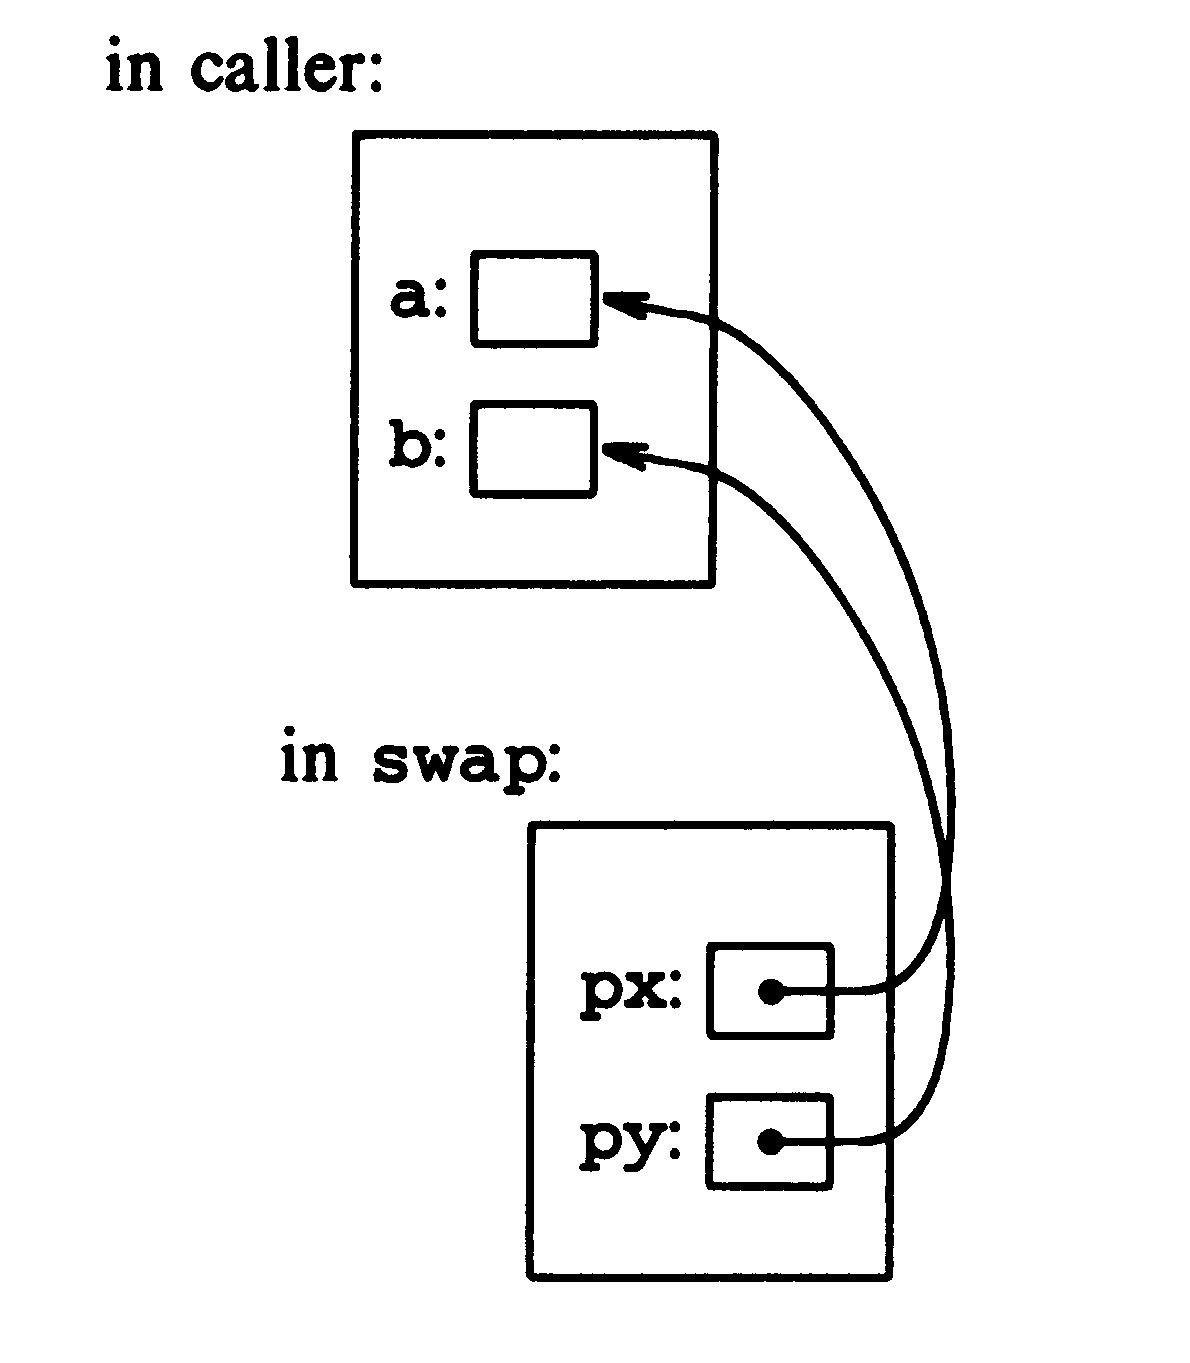
Pointer arguments enable a function to access and change objects in the
function that called it. As an example, consider a function getint that performs
free-format input conversion by breaking a stream of characters into
integer values, one integer per call. getint has to return the value it found
and also signal end of file when there is no more input. These values have to be
passed back by separate paths, for no matter what value is used for EOF, that
could also be the value of an input integer.
One solution is to have getint return the end of file status as its function
value, while using a pointer argument to store the converted integer back in the
calling function. This is the scheme used by scanf as well; see Section 7.4.
The following loop fills an array with integers by calls to getint:

<code>
    int n, array[SIZE], getint(int *);
    for (n = 0; n < SIZE && getint(&array[n]) 1= EOF; n++)
        ;
     </code>
    
Each call sets <code>array[n]</code> to the next integer found in the input and increments
n. Notice that it is essential to pass the address of array[n] to getint.
Otherwise there is no way for getint to communicate the converted integer
back to the caller.
Our version of getint returns EOF for end of file, zero if the next input is
not a number, and a positive value if the input contains a valid number.   


In [ ]:
#include <ctype.h>

int getch(void);
void ungetch(int);

/* getint: get next integer from input into *pn */
int getint(int *pn)
    {
        int c, sign;
        while (isspace(c = getch())) /* skip white space */
            ;
        if (!isdigit(c) && c != EOF && c != '+' && c != '-') 
        {
            ungetch(c);  /* it's not a number */
            return 0;
        }
        sign = (c == '-') ? -1 : 1;
        if (c == ' + ' I I c == ' - ' )
            c = getch();

        for (*pn = 0; isdigit(c); c = getch())
            *pn = 10 * *pn + (c - '0');
        *pn *= sign;

        if (c != EOF)
            ungetch (c) ;

        return c;
    }

Throughout getint, <code>*pn</code> is used as an ordinary int variable. We have also used getch and ungetch(described in Section 4.3) so the one extra character that must be read can be pushed back onto the input.
    
Exercise 5-1. As written, getint treats a + or - not followed by a digit as a
valid representation of zero. Fix it to push such a character back on the input.

Exercise 5-2. Write getfloat, the floating-point analog of getint. What
type does getfloat return as its function value? 


#  Pointers and Arrays
In C, there is a strong relationship between pointers and arrays, strong
enough that pointers and arrays should be discussed simultaneously. Anyopera-
tion that can be achieved by array subscripting can also be done with pointers.
The pointer version will in general be faster but, at least to the uninitiated,
somewhat harder to understand.
The declaration
<code>
    int a[10];
    </code>
defines an array a of size 10, that is, a block of 10 consecutive objects named
a[O], a[ 1], ... , a[9].

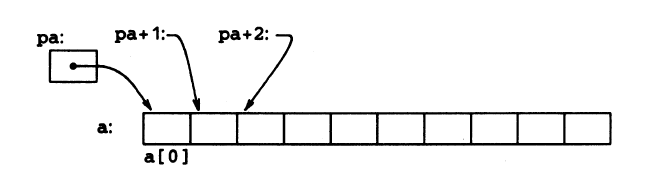

The notation a [i] refers to the i-th element of the array. If pa is a pointer to
an integer, declared as
<code>
    int *pa;
    </code>
then the assignment
<code>
    pa = &a[O];
</code>
sets pa to point to element zero of a; that is, pa contains the address of a[0].

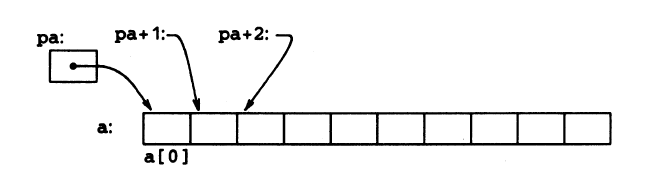

Now the assignment
<code>
    x = *pa;
    </code>
    
will copy the contents of a[0] into x.

If <code>pa</code> points to a particular element of an array, then by definition <code>pa+ 1</code> points to the next element, pa+i points i elements after pa, and pa-i points i elements before. Thus, if pa points to <code>a[0]</code>,
<code>
    *(pa+1 )
</code>
refers to the contents of a[1], pa+i is the address of a[i], and
<code>
    *(pa +i)
</code>
the contents of a[i].

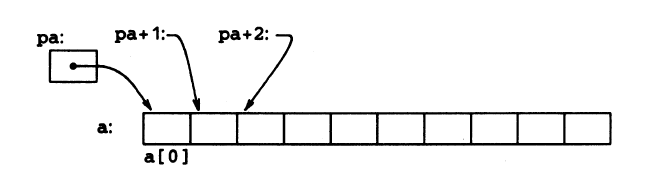

These remarks are true regardless of the type or size of the variables in the
array a. The meaning of "adding 1 to a pointer," and by extension, all pointer
arithmetic, is that pa+1 points to the next object, and pa+i points to the i-th 
object beyond pa.

The correspondence between indexing and pointer arithmetic is very close.
By definition, the value of a variable or expression of type array is the address
of element zero of the array. Thus after the assignment
<code>
    pa = &a[O];
</code>
pa and a have identical values. Since the name of an array is a synonym for
the location of the initial element, the assignment pa=&a[0] can also be written as
<code>
    pa = a;
    </code>
Rather more surprising, at least at first sight, is the fact that a reference to a[i] can also be written as <code> * (a+i)</code>. In evaluating a[i], C converts it to <code>* (a+i)</code> immediately; the two forms are equivalent. Applying the operator & to both parts of this equivalence, it follows that 
    &a[i] and a+i are also identical: a+i is the address of the i-th element beyond a. As the other side of this coin, if pa is a pointer, expressions may use it with a subscript; pa[i] is identical to
<code>*(pa+i)</code>. In short, an array-and-index expression is equivalent to one written as a pointer and offset.

There is one difference between an array name and a pointer that must be
kept in mind. A pointer is a variable, so pa=a and pa++ are legal. But an
array name is not a variable; constructions like a=pa and a++ are illegal.
When an array name is passed to a function, what is passed is the location
of the initial element. Within the called function, this argument is a local variable, and so an array name parameter is a pointer, that is, a variable containing an address. We can use this fact to write another version of strlen, which computes the length of a string.



In [ ]:
/* strlen: return length of string s */
int strlen(char *s)
    {
        int n;

        for (n = 0; *s != '\0'; s++)
            n++;
        return n;
    }

Since s is a pointer, incrementing it is perfectly legal; s++ has no effect on the character string in the function that called strlen, but merely increments
strlen's private copy of the pointer. That means that calls like
<code>
    strlen( "hello, world"); /* string constant */
    strlen (array) ; /* char array[100]; */
    strlen(ptr); /* char *ptr; */
</code>
all work.
As formal parameters in a function definition,
<code>
    char s[]
    </code>
and
<code>
    shar *s
    </code>
 are equivalent; we prefer the latter because it says more explicitly that the
parameter is a pointer. When an array name is passed to a function, the func-
tion can at its convenience believe that it has been handed either an array or a pointer, and manipulate it accordingly. It can even use both notations if it
seems appropriate and clear.
It is possible to pass part of an array to a function, by passing a pointer to
the beginning of the subarray. For example, if a is an array,
<code>
    f(&a[2])
    </code>
and
<code>
    f(a+2)
</code>       
both pass to the function f the address of the subarray that starts at a [ 2 ].
Within f, the parameter declaration can read
<code>
    f(int arr[])
         { ... }
</code>
or
<code>
    f(int *arr)
         { ... }
</code>
So as far as f is concerned, the fact that the parameter refers to part of a larger array is of no consequence.
If one is sure that the elements exist, it is also possible to index backwards in an array; p[-1], p[-2], and so on are syntactically legal, and refer to the elements that immediately precede p[0]. Of course, it is illegal to refer to objects that are not within the array bounds.
 
   

# Address Arithmetic
If p is a pointer to some element of an array, then p++ increments p to
point to the next element, and p+ = i increments it to point i elements beyond
where it currently does. These and similar constructions are the simplest forms
of pointer or address arithmetic.
C is consistent and regular in its approach to address arithmetic; its integra-
tion of pointers, arrays, and address arithmetic is one of the strengths of the
language. Let us illustrate by writing a rudimentary storage allocator. There
are two routines. The first, a 110c (n ), returns a pointer p to n .consecutive
character positions, which can be used by the caller of a110c for storing char-
acters. The second, afree (p ), releases the storage thus acquired so it can be
re-used later. The routines are "rudimentary" because the calls to afree must
be made in the opposite order to the calls made on a110c. That is, the storage
managed by alloc and afree is a stack, or last-in, first-out list. The stand-
ard library provides analogous functions called malloc and free that have no
such restrictions; in Section 8.7 we will show how they can be implemented.
.The easiest implementation is to have alloc hand out pieces of a large
character array that we will call allocbuf. This array is private to alloe
and afree. Since they deal in pointers, not array indices, no other routine
need know the name of the array, which can be declared static in the source
file containing alloc and afree, and thus be invisible outside it. In practical
implementations, the array may well not even have a name; it might instead be
obtained by calling malloc or by asking the operating system for a pointer to
some unnamed block of storage.
The other information needed is how much of allocbuf has been used.
We use a pointer, called allocp, that points to the next free element. When
alloc is asked for n characters, it checks to see if there is enough room left in
allocbuf. If so, alloc returns the current value of allocp (i.e., the begin-
ning of the free block), then increments it by n to point to the next free area. If
there is no room, alloc returns zero. afree (p) merely sets allocp to p if
p is inside allocbuf.

before call to alloc:
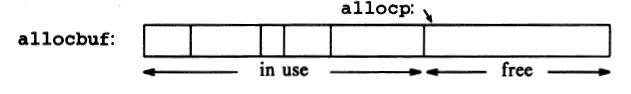

after call to alloc:
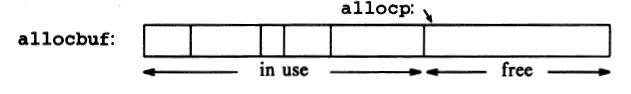



In [ ]:
#define ALLOCSIZE 10000 /* size of available space */

static char allocbuf[ALLOCSIZE];/* storage for alloc */
static char *allocp = allocbuf;/* next free position */

char *alloc(int n) /* return pointer to n characters */
    {
        if (allocbuf + ALLOCSIZE - allocp >= n)  /* it fits */
            {
            allocp += n;
            return allocp - n; /* old p */
            } 
        else /* not enough room */
            return 0;
}

void afree(char *p) /* free storage pointed to by p */
    {
        if (p >= allocbuf && p < allocbuf + ALLOCSIZE)
        allocp = p;
    }


In general a pointer can be initialized just as any other variable can, though
normally the only meaningful values are zero or an expression involving the
addresses of previously defined data of appropriate type. The declaration
<code>
    static char *allocp = allocbuf;
</code>

defines allocp to be a character pointer and initializes it to point to the beginning of allocbuf, which is the next free position when the program starts.
This have also been written
<code>
    static char *allocp = &allocbuf[O];
</code>
since the array name is the address of the zeroth element.

The test
<code>
    if (allocbuf + ALLOCSIZE - allocp >= n) { /* it fits */
</code>
checks if there's enough room to satisfy a request for n characters. If there is,the new value of al10cp would be at most one beyond the end of al1ocbuf.
If the request can be satisfied, al10c returns a pointer to the beginning of a
block of characters (notice the declaration of the function itself). If not, allocmust return some signal that no space is left. C guarantees that zero is never a valid address for data, so a return value of zero can be used to signal an abnormal event, in this case, no space.
Pointers and integers are not interchangeable. Zero is the sole exception: the
constant zero may be assigned to a pointer, and a pointer may be compared
with the constant zero. The symbolic constant NULL is often used in place of
zero, as a mnemonic to indicate more clearly that this is a special value for a
pointer. NULL is defined in <stdio. h>. We will use NULL henceforth.
Tests like
<code>
    if (allocbuf + ALLOCSIZE - allocp >= n) { /* it fits */
</code>
and
<code>
    if (p >= allocbuf && p < allocbuf + ALLOCSIZE)
     </code>
show several important facets of pointer arithmetic. First, pointers may be compared under certain circumstances. If p and q point to members of the same
array, then relations like ==, 1=, <, >=, etc., work properly. For example,
    <code>
    p < q
         </code>
is true if p points to an earlier member of the array than q does. Any pointer
can be meaningfully compared for equality or inequality with zero. But the
behavior is undefined for arithmetic or comparisons with pointers that do not
point to members of the same array. (There is one exception: the address of the
first element past the end of an array can be used in pointer arithmetic')
Second, we have already observed that a pointer and an integer may be
added or subtracted. The construction
    <code>
    p + n
        </code>
means the address of the n-th object beyond the one p currently points to. This
is true regardless of the kind of object p points to; n is scaled according to the size of the objects p points to, which is determined by the declaration of p. If an int is four bytes, for example, the int will be scaled by four.

Pointer subtraction is also valid: if p and q point to elements of the same
array, and p<q, then q-p+ 1 is the number of elements from p to q inclusive.
This fact can be used to write yet another version of strlen:


In [ ]:
/* strlen: return length of string s */
    int strlen(char *s)
    {
        char *p = s;
    
        while (*p != '\0')
            p++;
        return p - s;
    }

In its declaration, p is initialized to s, that is, to point to the first character of the string. In the while loop, each character in turn is examined until the '\0' at the end is seen. Because p points to characters, p++ advances p to the next character each time, and p-s gives the number of characters advanced over, that is, the string length. (The number of characters in the string could be too large to store in an into The header <stddef. h> defines a type ptrdiff_t that is large enough to hold the signed difference of two pointer values. If we were being very cautious, however, we would use size_ t for the return type of strlen, to match the standard library version. size_t is  the unsigned integer type returned by the sizeof operator.)

Pointer arithmetic is consistent: if we had been dealing with floats, which occupy more storage than chars, and if p were a pointer to float, p++ would advance to the next float. Thus we could write another version of alloc
that maintains floats instead of chars, merely by changing char to float
throughout alloc and afree. All the pointer manipulations automatically
take into account the size of the object pointed to.

The valid pointer operations are assignment of pointers of the same type,
adding or subtracting a pointer and an integer, subtracting or comparing two
pointers to members of the same array, and assigning or comparing to zero. All
other pointer arithmetic is illegal. It is not legal to add two pointers, or to multiply or divide or shift or mask them, or to add float or double to them, or
even, except for <code>void *</code>, to assign a pointer of one type to a pointer of another type without a cast.


# Character Pointers and Functions

A string constant, written as
~~~text
"I am a string"
~~~
is an array of characters. In the internal representation, the array is terminated with the null character '\0' so that programs can find the end. The length in storage is thus one more than the number of characters between the double quotes.
Perhaps the most common occurrence of string constants is as arguments to
functions, as in
<code>
    printf( "hello, world\n");
</code>
When a character string like this appears in a program, access to it is through a character pointer; printf receives a pointer to the beginning of the character array. That is, a string constant is accessed by a pointer to its first element.
String constants need not be function arguments. If pmessaqe is declared
as
<code>
    char *pmessage;
</code>
then the statement
<code>
    pmessage = "now is the time";
</code>
assigns to pmessaqe a pointer to the character array. This is not a string
copy; only pointers are involved. C does not provide any operators for process-
ing an entire string of characters as a unit.
There is an important difference between these definitions:
<code>
    char amessage[] = "now is the time"; /* an array */
    char *pmessage = "now is the time"; /* a pointer */
    </code>
amessaqe is an array, just big enough to hold the sequence of characters and
'\0' that initializes it. Individual characters within the array may be changed but amessaqe will always refer to the same storage. On the other hand, pmessaqe is a pointer, initialized to point to a string constant; the pointer may subsequently be modified to point elsewhere, but the result is undefined if you try to modify the string contents.

We will illustrate more aspects of pointers and arrays by studying versions of
two useful functions adapted from the standard library. The first function is
strcpy(s , t), which copies the string t to the string s. It would be nice just to say s=t but this copies the pointer, not the characters. To copy the
characters, we need a loop. The array version is first:

<code>
/* strcpy: copy t to s; array subscript version */
    void strcpy(char *s, char *t)
    {
        int i;
        i = 0;
        while ((s[i] = t [ii]) != '\0')
            i++; 
    }
</code>

For contrast, here is a version of strcpy with pointers:

<code>
    /* strcpy: copy t to s; pointer version 1 */
    void strcpy(char *s, char *t)
    {
        while((*s = *t) != '\0') 
        {
            s++;
            t++;
        }
    }
    </code>
Because arguments are passed by value, strcpy can use the parameters s and
t in any way it pleases. Here they are conveniently initialized pointers, which are marched along the arrays a character at a time, until the ' \0' that terminates t has been copied to s.
In practice, strcpy would not be written as we showed it above. Experienced C programmers would prefer
    

In [ ]:
/* strcpy: copy t to S; pointer version 2 */

void strcpy(char *s, char *t)
    {
        while ((*s++ = *t++) != '\0 )
            ;
    }


This moves the increment of s and t into the test part of the loop. The value of
<code>*t++</code> is the character that t pointed to before t was incremented; the postfix ++ doesn't change t until after this character has been fetched. In the sameway, the character is stored into the old s position before s is incremented.
This character is also the value that is compared against '\0' to control the loop. The net effect is that characters are copied from t to s, up to and including the terminating' \0'.
As the final abbreviation, observe that a comparison against '\0' is redundant, since the question is merely whether the expression is zero. So the function would likely be written as


In [ ]:
* strcpy: copy t to s; pointer version 3 */
void strcpy(char *s, char *t)
{
    while (*s++ = *t++)
        ;
}


Although this may seem cryptic at first sight, the notational convenienceis considerable, and the idiom should be mastered, because you will see it frequently in C programs.
The strcpy in the standard library<string.h> returns the target string as its function value.
The second routine that we will examine is strcmp( s, t), which compares the character strings s and t, and returns negative, zero or positive if s is lexicographically less than, equal to, or greater than t. The value is obtained by subtracting the characters at the first position where sand t disagree.


In [ ]:
/* strcmp: return <0 if s<t, 0 if s==t, >0 if s>t */
int strcmp(char *s, char *t)
{
    int i;

    for (i = 0; s[i] == t[i]; i++)
        if (s[i] == '\0')
            return 0;

    return s[i] - t[i];
}

the pointer version of strcmp:

In [ ]:
/* strcmp: return <0 if s<t, 0 if s==t, >0 if s>t */
int strcmp(char *s, char *t)
{
    for ( ; *s == *t; s++, t++)
        if (*s == '\0' )
            return 0;
    return *s - *t;
}


Since ++ and -- are either prefix or postfix operators, other combinations of * and ++ and -- occur, although less frequently. For example, 
<code>
    *--p
    </code>
decrements p before fetching the character that p points to. In fact, the pair of expressions
<code>
    *p++ = val; /* push val onto stack */
    val = *--p; /* pop top of stack into val */
</code>
are the standard idioms for pushing and popping a stack; see Section 4.3.
The header <string. h> contains declarations for the functions mentioned
in this section, plus a variety of other string-handling functions from the standard library.

Exercise 5-3. Write a pointer version of the function strcat that we showed
in Chapter 2: strcat(s , t) copies the string t to the end of s. 

Exercise 5-4. Write the function strend (s , t ), which returns 1 if the string
t occurs at the end of the string s, and zero otherwise. 

Exercise 5-5. Write versions of the library functions strncpy, strncat, and
strncmp; which operate on at most the first n characters of their argument
strings. For example, strncpy (s,t , n) copies at most n characters of t to s.
Full descriptions are in Appendix B. 

Exercise 5-6. Rewrite appropriate programs from earlier chapters and exercises
with pointers instead of array indexing. Good possibilities include getline
(Chapters 1 and 4), atoi, i toa, and their variants (Chapters 2, 3, and 4),
reverse (Chapter 3), and strindex and getop (Chapter 4). 


# Pointer Arrays; Pointers to Pointers

Since pointers are variables themselves, they can be stored in arrays just as
other variables can. Let us illustrate by writing a program that will sort a set of text lines into alphabetic order, a stripped-down version of the UNIX program sort.

In Chapter 3 we presented a Shell sort function that would sort an array of
integers, and in Chapter 4 we improved on .it with a quicksort. The same algorithms will work, except that now we have to deal with lines of text, which are of different lengths, and which, unlike integers, can't be compared or moved in a single operation. We need a data representation that will cope efficiently and conveniently with variable-length text lines.

This is where the array of pointers enters. If the lines to be sorted are stored end-to-end in one long character array, then each line can be accessed by a pointer to its first character. The pointers themselves can be stored in an array.

Two lines can be compared by passing their pointers to strcmp. When two
out-of-order lines have to be exchanged, the pointers in the pointer array are
exchanged, not the text lines themselves.

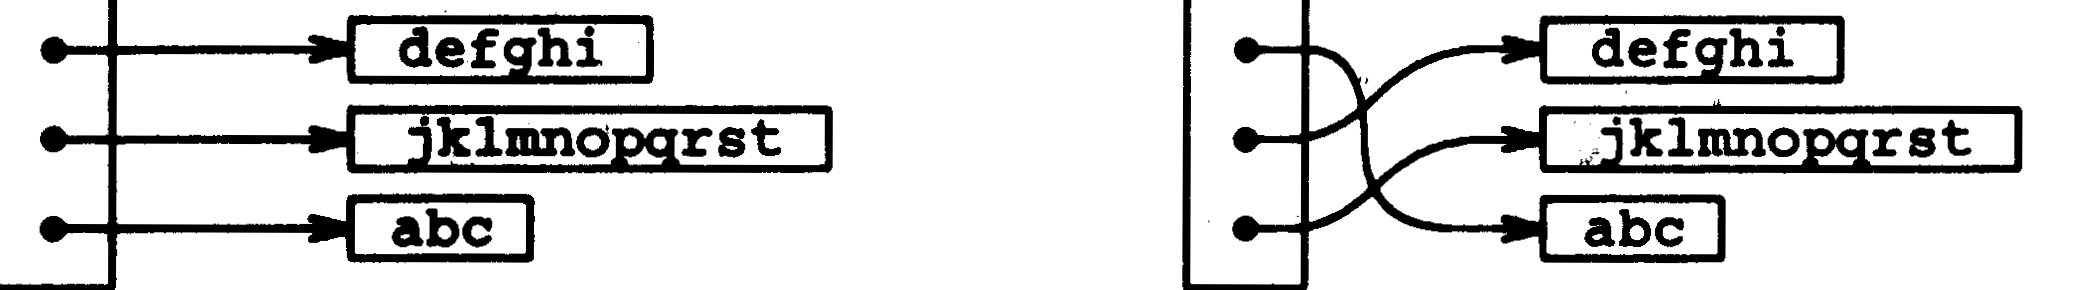


The sorting process has three steps:

~~~text
read all the lines of input
sort them
print them in order
~~~

As usual, it's best to divide the program into functions that match this natural division, with the main routine controlling the other functions. Let us defer the sorting step for a moment, and concentrate on the data structure and the input and output.
The input routine has to collect and save the characters of each line, and build an array of pointers to the lines. It will also have to count the number of input lines, since that information is needed for sorting and printing. Since the input function can only cope with a finite number of input lines, it can return some illegal line count like -1 if too much input is presented. 
The output routine only has to print the lines in the order in which they appear in the array of pointers.

In [ ]:
#include <string.h>
#include<stdio.h>

#define MAXLINES 5000 /* max Ilines to be sorted */
char *lineptr[MAXLINES]; /* pointers to text lines */

int readlines(char *lineptr[], int nlines);
void writelines(char *lineptr[], int nlines);
void qsort(char *lineptr[], int left, int right);

/* sort input lines */
int main())
    {
        int nlines; /* number of input lines read */

        if ((nlines = readlines(lineptr, MAXLINE)) >= 0) 
        {
            qsort(lineptr, 0, nlines-1);
            writelines(lineptr, nlines);
            return 0;
        } 
        else 
        {
            printf("error: input too big to sort\n");
            return 1;
        }
    }


#define MAXLEN 1000 /* max length of any input line */
int getline(char *, int);
char *alloc(int);

/* readlines: read input lines */
int readlines(char *lineptr[], int maxlines)
    {
    int len, nlines;
    char *p, line[MAXLEN];

    nlines = 0;
    while((len = getline(line, MAXLEN» > 0)
        if (nlines >= maxlines || (p = alloc(le)) == NULL)
        return -1;
    else 
        {
        line[len-1] = '\0'; /* delete newline */
        strcpy(p, line);
        lineptr[nlines++] = p;
        }
    
    return nlines;
    }

/* writelines: write output lines */
void writelines(char *lineptr[], int nlines)
    {
    int i;

    for (i = 0; i < nlines; i++)
    printf("%s\n", lineptr[i]);
    }



The function getline is from Section 1.9.
The main new thing is the declaration for lineptr:
<code>
    char *lineptr[MAXLINES]
</code>
says that 1ineptr is an array of MAXLINES elements, each element of which
is a pointer to a char. That is, lineptr[i] is a character pointer, and
<code>*lineptr[i]</code>
is the character it points to, the first character of the i-th saved text line.

Since lineptr is itself the name of an array, it can be treated as a pointer in the same manner as in our earlier examples, and writelines  can be written instead as

<code>
     /* writelines: write output lines */
    void writelines(char *lineptr[], int nlines)
    {
        while (nlines-- > 0)
            printf ("%s\n", *lineptr++);
    }
</code>

Initially <code>*lineptr</code> points to the first line; each increment advances it to the next line pointer while nlines is counted down.
With input and output under control, we can proceed to sorting. The quick-sort from Chapter 4 needs minor changes: the declarations have to be modified,
and the comparison operation must be done by calling strcmp. The algorithm
remains the same, which gives us some confidence that it will still work.



In [ ]:
/* qsort: sort v[left] ...v[rightl into increasing order */

void qsort(char *v[], int left, int right)
{
    int i, last;
    void swap(char *v[], int i, int j);
     if (left >= right) /* do nothing if array contains */
        return;         /* fewer than two elements */

    swap(v, left, (left + right)/2);
    last = left;
    for (i = left+1; i <= right; i++)
        if (strcmp(v[i], v[left]) < 0)
    swap(v, ++last, i);
    swap(v, left, last);
    qsort(v, left, last-1);
    qsort(v, last+1, right);
}

/* swap with triviaL changes: */
/* interchange v[i] and v[j] */
void swap(char *v[], int i, int j)
{
    char *temp;

    temp = v[i];
    v[i] = v[j];
    v[j] = temp;
}


Since any individual element of v (alias lineptr) is a character pointer, temp must be also, so one can be copied to the other.

Exercise 5-7. Rewrite readlines to store lines in an array supplied by main,
rather than calling alloc to maintain storage. How much faster is the pro-
gram? 


# Multi-dimensional Arrays

C provides rectangular multi-dimensional arrays, although in practice they
are much less used than arrays of pointers. In this section, we will show some
of their properties.
Consider the problem of date conversion, from day of the month to day of
the year and vice versa. For example, March 1 is the 60th day of a non-leap
year, and the 61st day of a leap year. Let us define two functions to do the
conversions: day_of _year_ converts the month and day into the day of the
year, and month_day converts the day of the year into the month and day.
Since this latter function computes two values, the month and day arguments
will be pointers:
<code>
    month_day(1988, 60, &m, &d)
</code>
sets m to 2 and d to 29 (February 29th).
These functions both need the same information, a table of the number of
days in each month ("thirty days hath September ..."). Since the number of
days per month differs for leap years and non-leap years, it's easier to separate
them into two rows of a two-dimensional array than to keep track of what hap-
pens to February during computation. The array and the functions for perform-
ing the transformations are as follows:



In [ ]:
static char daytab[2][13] = {
to, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31},
to, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31}
} ;

/* day_of_year: 
 set day of year from month & day */
int day_of_year(int year, int month, int day)
{
    int i, leap;
    leap = year%4 == 0  && year%100 != 0 || year%400 == 0;
    for (i = 1; i < month; i++)
        day += daytab[leap][i];
    return day;
}

/* month_day: set month, day from day of year */
void month_day(int year, int yearday, int *pmonth, int *pday)
{
    int i, leap;

    leap = year%4 == 0 && year%100 != 0 || year%400 == 0;
    for (i = 1; yearday> daytab[leap][i]; i++)
        yearday -= daytab[leap][i];
    *pmonth = i;
    *pday = yearday;
}

Recall that the arithmetic value of a logical expression, such as the one for
leap, is either zero (false) or one (true), so it can be used as a subscript of the array day tab.
The array day tab has to be external to both day_of_year and month_day, so they can both use it. We made it char to illustrate a legiti-
mate use of char for storing small non-character integers.
day tab is the first two-dimensional array we have dealt with. In C, a two-
dimensional array is really a one-dimensional array, each of whose elements is
an array. Hence subscripts are written as
<code>
    daytab[i][j]  /* [row][col] */
</code>
rather than
<code>
    daytab[i,j]  /* WRONG */
</code>

Other than this notational distinction, a two-dimensionalarray can be treated in much the same way as in other languages. Elements are stored by rows, so the
rightmost subscript, or column, varies fastest as elements are accessed in storage order.
An array is initialized by a list of initializers in braces; each row of a two-
dimensional array is initialized by a corresponding sub-list. We started the
array day tab with a column of zero so that month numbers can run from the
natural 1 to 12 instead of 0 to 11. Since space is not at a premium here, this is clearer than adjusting the indices.
If a two-dimensional array is to be passed to a function, the parameter declaration in the function must include the number of columns; the number of rows is irrelevant, since what is passed is, as before, a pointer to an array of rows, where each row is an array of 13 ints. In this particular case, it is a pointer to objects that are arrays of 13 ints. Thus if the array day tab is to be passed to a function f, the declaration of f would be
<code>
    f(int daytab [2] [ 13]) { ... }
</code>
It could also be
<code>
    f(int daytab [ ] [ 13]) { ... }
</code>
since the number of rows is irrelevant, or it could be
<code>
    f(int (*daytab) [ 13]) { ... }
    </code>
which says that the parameter is a pointer to an array of 13 integers. The
parentheses are necessary since brackets [] have higher precedence than * .
Without parentheses, the declaration
<code>
    int *daytab[13]
</code>
is an array of 13 pointers to integers. More generally, only the first dimension (subscript) of an array is free; all the others have to be specified. Section 5.12 has a further discussion of complicated declarations.

Exercise 5-8. There is no error checking in day_of_year or month_ day.
Remedy this defect. 



# Initialization of Pointer Arrays

Consider the problem of writing a function month_name (n), which returns a pointer to a character string containing the name of the n-th month. This is an ideal application for an internal static  array. month_name contains a private array of character strings, and returns a pointer to the proper one when
called. This section shows how that array of names is initialized.
The syntax is similar to previous initializations:


In [ ]:
/* month_name: return name of n-th month */
char *month_name(int n)
{
    static char *name[] = {
    "Illegal month",
    "January", "February", "March",
    "April", "May", "June",
    "July", "August", "September",
    "October", "November", "December"
    } ;

    return (n < 1 || n > 12) ? name[0] : name[n];
}

The declaration of name, which is an array of character pointers, is the same as liineptr  in the sorting example. The initializer is a list of character strings; each is assigned to the corresponding position in the array. The characters of the i-th string are placed somewhere, and a pointer to them is stored in name[i]. Since the size of the array name is not specified, the compiler counts the initializers and fills in the correct number.


# Pointers vs. Multi-dimensional Arrays

Newcomers to C are sometimes confused about the difference between a
two-dimensional array and an array of pointers, such as name in the example
above. Given the definitions
<code>
    int a [ 10][20] ;
    int *b[10];
    </code>
then a[3][4] and b [3][4] are both syntactically legal references to a single
into But a is a true two-dimensional array: 200 int-sized locations have been set aside, and the conventional rectangular subscript calculation 20xrow+col is used to find the element a I[row Hcol]. For b, however, the definition only allocates 10 pointers and does not initialize them; initialization must be done explicitly, either statically or with code. Assuming that each element of b does point to a twenty-element array, then there will be 200 ints set aside, plus ten cells for the pointers. The important advantage of the pointer array is that the rows of the array may be of different lengths. That is, each element of b need not point to a twenty-element vector; some may point to two elements, some to fifty,
and some to none at all.
Although we have phrased this discussion in terms of integers, by far the
most frequent use of arrays of pointers is to store character strings of diverse
lengths, as in the function month_name. Compare the declaration and picture
for an array of pointers:
    <code>
    char *name[] = { "Illegal month", "Jan, "Feb", "Mar" };
    </code>
    
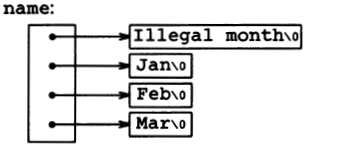

with those for a two-dimensional array:
<code>
    char aname[] [15] = { "Illegal month", "Jan", "Feb", "Mar" };
    </code>
   
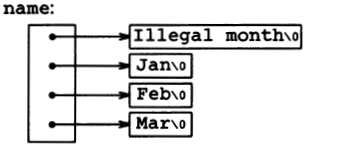

Exercise 5-9. Rewrite the routines day_of_year and month_day with pointers instead of indexing. 


# Command-line Arguments

In environments that support C, there is a way to pass command-line argu-
ments or parameters to a program when it begins executing. When main is
called, it is called with two arguments. The first (conventionally called argc,
for argument count) is the number of command-line arguments the program
was invoked with; the second (argv, for argument vector) is a pointer to an
array of character strings that contain the arguments, one per string. We cus-
tomarily use multiple levels of pointers to manipulate these character strings.
The simplest illustration is the program echo, which echoes its command-
line arguments on a single line, separated by blanks. That is, the command
<code>
    echo hello, world
    </code>
prints the output
~~~text
hello, world
~~~

By convention, argv [0] is the name by which the program was invoked, so
argc is at least 1. If argc is 1, there are no command-line arguments after
the program name. In the example above, argc is 3, and argv [0], argv [1],
and argv[2] are "echo", "hello, ", and "world" respectively. The first optional argument is argv[1] and the last is argv[argc-1];  additionally, the standard requires that argv[ argc] be a null pointer.

![image.png](attachment:image.png)

The first version of echo treats argv as an array of character pointers:
~~~text
    #include "stdio.h"
    /* echo command-line arguments; 1st version */
    main(int argc, char *argv[])
    {
        int i;
        for (i = 1; i < argc; i++)
            printf( "%s%s", argv[i], (i < argc-1) ? " " : "");
        printf ("\n");
        return 0;
    }    
~~~
    
Since argv is a pointer to the beginning of the array of argument strings, incrementing it by 1 (++argv) makes it point at the original argv [1] instead of argv [0]. Each successive increment moves it along to the next argument;
<code>*argv</code> is then the pointer to that argument. At the same time, argc is decremented; when it becomes zero, there are no arguments left to print.
Alternatively, we could write the printf statement as
<code>
    printf((argc > 1) ? "%s " : "%s", *++argv);
</code>
This shows that the format argument of printf can be an expression too.
As a second example, let us make some enhancements to the pattern-finding program from Section 4.1. If you recall, we wired the search pattern deep into the program, an obviously unsatisfactory arrangement. Following the lead of the UNIX program grep, let us change the program so the pattern to be matched is specified by the first argument on the command line.



In [ ]:
#include <stdio.h>
#include <string.h>
#define MAXLINE 1000

int getline(char *line, int max);

/* find: print lines that match pattern from 1st arg */
main(int argc, char *arqv[])
{
    char line[MAXLINE];
    int found = 0;

    if (argc != 2)
        printf ("Usage: find pattern\n");
    else
        while (getline(line, MAXLINE) > 0)
            if (strstr(line, arqv[1]) 1= NULL) 
            {
                printf("%s", line);
                found++;
            }
    return found;
}

The standard library function strstr (s, t) returns a pointer to the first occurrence of the string t in the string s, or NULL if there is none. It is declared in <string. h>.
The model can now be elaborated to illustrate further pointer constructions. Suppose we want to allow two optional arguments. One says "print all lines except those that match the pattern;" the second says "precede each printed line by its line number."
A common convention for C programs on UNIX systems is that an argument that begins with a minus sign introduces an optional flag or parameter. If we
choose -x {for "except") to signal the inversion, and -n ("number") to request
line numbering, then the command
<code>
    find -x -n pattern
    </code>
will print each line that doesn't match the pattern, preceded by its line number.
Optional arguments should be permitted in any order, and the rest of theprogram should be independent of the number of arguments that were present.Furthermore, it is convenient for users if option arguments can be combined, as in
<code>
    find -nx pattern
    </code>
Here is the program:


In [ ]:
#include <stdio.h>
#include <string.h>
#define MAXLINE 1000

int getline(char *line, int max);

/* find: print lines that match pattern from 1st arg */
main(int argc, char *argv[])
{
    char line[MAXLINE];
    long lineno = 0;
    int c, except = 0, number=0, found=0;

    while (--argc > 0 && (*++argv)[O] == '-')
        while (c = *++argv[O])
    switch (c) 
        {
        case 'x':
            except = 1;
            break;
        case 'n':
            number = 1;
            break;
        default:
            printf("find: illegal option "c\n", c);
            argc = 0;
            found = -1;
            break;
        }
    if (argc != 1)
        printf("Usage:find -x -n pattern\n");
    else
        while (getline(line, MAXLINE) > 0) 
            {
            lineno++;
            if((strstr(line, *argv) != NULL) != except) 
                {
                if (number)
                    printf (""ld:", lineno);
            printf("%s", line);
            found++;
            }
        }
    return found;
}


argc is decremented and argv is incremented before each optional argument. At the end of the loop, if there are no errors, argo tells how many arguments remain unprocessed and argv points to the first of these. Thus argc should be 1 and <code>*argv</code> should point at the pattern. Notice that <code>*++argv</code> is a pointer to an argument string, so <code>(*++argv)[0]</code> is its first character. (An alternate valid form would be <code>**++argv</code>.) Because [] binds tighter than * and ++, the parentheses are necessary; without them the expression would be taken as <code>*++(argv[0 ])</code>. In fact, that is what we used in the inner loop, where the task is to walk along a specific argument string. In the inner loop,
the expression <code>*++argv[0]</code> increments the pointer argv[O].
It is rare that one uses pointer expressions more complicated than these; in
such cases, breaking them into two or three steps will be more intuitive.

Exercise 5-10. Write the program expr, which evaluates a reverse Polish
expression from the command line, where each operator or operand is a separate
argument. For example,
<code>
    expr 2 3 4 + *
</code>
evaluates 2 x (3+4).
 
Exercise 5-11. Modify the programs entab and detab (written as exercises in
Chapter 1) to accept a list of tab stops as arguments. Use the default tab set-
tings if there are no arguments. 


Exercise 5-12. Extend entab and detab to accept the shorthand
<code>
    entab -m +n
    </code>
to mean tab stops every n columns, starting at column m. Choose convenient (for the user) default behavior. 

Exercise 5-13. Write the program tail, which prints the last n lines of its
input. By default, n is 10, let us say, but it can be changed by an optional
argument, so that
<code>
    tail -n
    </code>
prints the last n lines. The program should behave rationally no matter how
unreasonable the input or the value of n. Write the program so it makes the
best use of available storage; lines should be stored as in the sorting program of Section 5.6, not in a two-dimensional array of fixed size. 


# Pointers to Functions

In C, a function itself is not a variable, but it is possible to define pointers to functions, which can be assigned, placed in arrays, passed to functions, returned by functions, and so on. We will illustrate this by modifying the sorting procedure written earlier in this chapter so that if the optional argument -n is given; it will sort the input lines numerically instead of lexicographically.

A sort often consists of three parts-a comparison that determines the ordering of any pair of objects, an exchange that reverses their order, and a
sorting algorithm that makes comparisons and exchanges until the objects are in
order. The sorting algorithm is independent of the comparison and exchange
operations, so by passing different comparison and exchange functions to it, we
can arrange to sort by different criteria. This is the approach taken in our new sort.

Lexicographic comparison of two lines is done by strcmp, as before; we will also need a routine numcmpthat compares two lines on the basis of numeric value and returns the same kind of condition indication as strcmp does. These functions are declared ahead of main and a pointer to the appropriate one is passed to qsort. We have skimped on error processing for arguments, so as to concentrate on the main issues.



In [ ]:
#include <stdio.h>
#include <string.h>

#define MAXLINES 5000 /* max #lines to be sorted */
char *lineptr[MAXLINES]; /* pointers to text lines */

int readlines(char *lineptr[], int nlines);
void writelines(char *lineptr[], int nlines);

void qsort(void *lineptr[], int left, int right,
    int (*comp) (void *, void ));

int numcmp(char *, char *);

/* sort input lines */
main(int argc, char *argv[])
{
    int nlines; /* number of input lines read */
    int numeric = 0; /* 1 if numeric sort */

    if (argc > 1 && strcmp(argv[1], "-n") == 0)
        numeric = 1;
    if ((nlines = readlines(lineptr, MAXLINE)) >= 0) 
        {
        qsort(void **) lineptr, 0, nlines-1,
            (int (*)(void*,void))(numeric ? numcmp : strcmp));
        writelines(lineptr, nlines);
        return 0;
        } 
    else 
        {
        printf("input too big to sort\n");
        return 1;
        }
}

In the call to qsort, strcmp and numcmpare addresses of functions. Since
they are known to be functions, the & operator is not necessary, in the same way that it is not needed before an array name.
We have written qsort so it can process any data type, not just character strings. As indicated by the function prototype, qsort expects an array of
pointers, two integers, and a function with two pointer arguments. The generic
pointer type void * is used for the pointer arguments. Any pointer can be cast
to void * and back again without loss of information, so we can call qsort by
casting arguments to void * . The elaborate cast of the function argument
casts the arguments of the comparison function. These will generally have no
effect on actual representation, but assure the compiler that all is well.



In [ ]:
/* qsort: sort v[left] •..v[right] into increasing order */
void qsort(void *v[], int left, int right,
        int (*comp)(void *, void *»
{
    int i, last;
    void swap(void *v[], int, int);

    if (left >= right)  /* do nothing if array contains */
        return;         /* fewer than two elements */
    swap(v, left, (left + right)/2);
    last = left;
    for (i = left+1; i <= right; i++)
        if ((*comp)(v[i], v[left]) < 0)
            swap(v, ++last, i);
    swap(v, left, last);
    qsort(v, left, last-1, comp);
    qsort(v, last+1, right, comp);
} 

The declarations should be studied with some care. The fourth parameter of qsort is
<code>
    int (*comp) (void *, void *)
</code>
which says that comp is a pointer to a function that has two void * arguments
and returns an into
The use of comp in the line
<code>
    if (*comp)(v[i], v[left]) < 0)
    </code>
    is consistent with the declaration: comp is a pointer to a function, <code>*comp</code> is the function, and
<code>
    (*comp)(v[i], v[left])
    </code>
is the call to it. The parentheses are needed so the components are correctly
associated; without them,
<code>
    int *comp(void *, void *) /* WRONG */
    </code>
says that comp is a function returning a pointer to an int, which is very dif-
ferent.
    
We have already shown strcmp, which compares two strings. Here is
numcmp, which compares two strings on a leading numeric value, computed by
calling atof:
~~~text
    #include <stdlib.h>
    /* numcmp: compare s1 and s2 numerically */
    int numcmp(char *s1, char *s2)
    {
        double v1, v2;
        v1 = atof(s1);
        v2 = atof(s2);    
        if (v1 < v2)
            return -1;
        else if (v1 > v2)
            return 1;
        else
            return 0;
     }
~~~
    
The swap function, which exchanges two pointers, is identical to what we presented earlier in the chapter, except that the declarations are changed to void *.
<code>
    void swap(void *v[], int i, int j)
    {
        void *temp;
        temp = veil;
        veil = v[j];
        v[j] = temp;
     }
</code>

A variety of other options can be added to the sorting program; some make
challenging exercises.

Exercise 5-14. Modify the sort program to handle a -r flag, which indicates
sorting in reverse (decreasing) order. Be sure that -r works with =n, 

Exercise 5-15. Add the option -f to fold upper and lower case together, so that
case distinctions are not made during sorting; for example, a and A compare
equal. 

Exercise 5-16. Add the -d ("directory order") option, which makes comparis-
ons only on letters, numbers and blanks. Make sure it works in conjunction
with -f. 

Exercise 5-17. Add a field-handling capability, so sorting may be done on fields within lines, each field sorted according to an independent set of options. (The index for this book was sorted with -df for the index category and -n for the page numbers') 



# Complicated Declarations

C is sometimes castigated for the syntax of its declarations, particularly ones
that involve pointers to functions. The syntax is an attempt to make the
declaration and the use agree; it works well for simple cases, but it can be
confusing for the harder ones, because declarations cannot be read left to right,
and because parentheses are over-used. The difference between
<code>
    int *f(); /* f: function returning pointer to int */
</code>
and
<code>
    int (*pf)(); /* pf: pointer to function returning int */
</code>
llustrates the problem: * is a prefix operator and it has lower precedence than
( ), so parentheses are necessary to force the proper association.
Although truly complicated declarations rarely arise in practice, it is important to know how to understand them, and, if necessary, how to create them.
One good way to synthesize declarations is in small steps with typede£, which is discussed in Section 6.7. As an alternative, in this section we will present a pair of programs that convert from valid C to a word description and back
again. The word description reads left to right.
The first, dcl, is the more complex. It converts a C declaration into a word
description, as in these examples:
<code>
    char **argv
        argv: pointer to pointer to char
    int (*daytab)[13]
        daytab: pointer to array[13] of int
    int *daytab[13]
        daytab: array[13] of pointer to int
    void *comp()
        comp: function returning pointer to void
    void (*comp)()
        comp: pointer to function returning void
    char (*(*x())[])()
        x: function returning pointer to array[] of
        pointer to function returning char
    char (*(*x[3])())[5]
        x: array[3] of pointer to function returning
        pointer to array[S] of char
</code>

dCl is based on the grammar that specifies a declarator, which is spelled out precisely in Appendix A, Section 8.5; this is a simplified form:
~~~text
dcl:
    optional *'s direct-del
direct-dcl: name
            (dxl)
            direct-dcl( )
            direct-dcl [optional size]
~~~
In words, a dcl is a direct-dcl, perhaps preceded by * 's. A direct-dcl is a name, or a parenthesized del, or a direct -dcl followed by parentheses, or a direct-dcl followedby brackets with an optional size.
This grammar can be used to parse declarations. For instance, consider this
declarator:
<code>
    (* pfa[])()
</code>
pfa will be identified as a name and thus as a direct -del. Then pfa[] is also a direct-dcl. Then <code>*pfa[]</code> is a recognized as a del, so <code>(* pfa[ ])</code> is a direct-dcl. Then <code>(* pfa[ ] ) ( )</code> is a direct-dcl and thus a dcl, We can also illustrate the parse with a parse tree like this (where direct-dcl has been abbreviated to dir-dcl):
 ![image.png](attachment:image.png)
The heart of the dcl program is a pair of functions, dcl and dirdcl, that parse a declaration according to this grammar. Because the grammar is recursively defined, the functions call each other recursively as they recognize pieces of a declaration; the program is called a recursive-descent parser.


In [ ]:
/* dirdcl: parse a direct declarator */
void dirdcl(void)
{
    int type;
    if (tokentype == '(') {  /* ( dcl ) */
        dcl ();
        if (tokentype != ')')
        printf{"error: missing )'n");
    } 
    else if (tokentype == NAME) /* variable name */
        strcpy{name, token);
    else
        printf("error: expected name or (dcl)'n");

    while ((type=gettoken()) == PARENS || type == BRACKETS)
        if (type == PARENS)
            strcat(out, "function returning");
        else 
            {
            strcat (out, "array");
            strcat(out, token);
            strcat (out, " of ");
    }
}


Since the programs are intended to be illustrative, not bullet-proof, there are significant restrictions on del. It can only handle a simple data type like char or into It does not handle argument types in functions, or qualifiers like
const. Spurious blanks confuse it. It doesn't do much error recovery, so
invalid declarations will also confuse it. These improvements are left as exercises.
Here
are the global variables and the main routine:


In [ ]:
#include <stdio.h>
#include <string.h>
#include <ctype.h>

#define MAXTOKEN  100

enum { NAME, PARENS, BRACKETS } ;

void dcl(void);     
void dirdcl(void);  

int gettoken(void); 

int tokentype; /* type of last token */
char token[MAXTOKEN]; /* last token string */
char name [MAXTOKEN];  /* identifier name */
char datatype[MAXTOKEN];  /* data type = char, int, etc. */
char out [1000] ; /* output string */

maine) / convert declaration to words */
{
    while (gettoken () != EOF) /* 1 st token on line */
        {
        strcpy(datatype, token); /* is the datatype */
        out [ 0] = ' \0' ;
        dcl(); /* parse rest of line */
        if (tokentype != '\n')
            printf("syntax error\n");
        printf("%s: %s %s\n", name, out, datatype);
        }
    return 0;
}


/* The function gettoken skips blanks and tabs, then finds the next token in
the input; a "token" is a name, a pair of parentheses, a pair of brackets perhaps
including a number, or any other single character. */

int gettoken(void) /* return next token */
{
    int c, getch(void);
    void ungetch(int);
    char *p = token;

    while ((c = getch()) == ' ' || c == '\t')
        ;

    if (c  == ' ( ') 
        {
        if ((c = getch(» == ')')
         {
        strcpy(token, "()");
        return tokentype = PARENS;
        } 
    else 
        {
        ungetch (c) ;
        return tokentype = '(';
        }
    } 
    else if (c == '[')
         {
        for (*p++ = c; (*p++ = getch((()) != ']';)
            ;
        *p = '\0';
        return tokentype = BRACKETS;
        } 
    else if (isalpha(c)) 
        {
        for (*p++ = c; isalnum(c = getch()); )
            *p++ = c;
        *p = '\0';
        ungetch (c) ;
        return tokentype = NAME;
        } 
    else
        return tokentype = c;
}

/* getch and ungetch were discussed in Chapter 4 */

Going in the other direction is easier, especially if we do not worry about generating redundant parentheses. The program undcl converts a word description like "x is a function returning a pointer to an array of pointers to functions returning char," which we will express as
<code>
    x () * [] * () char
    </code>
to
<code>
    char (*(*x())[])()
</code>
The abbreviated input syntax lets us reuse the gettoken function. undcl also
uses the same external variables as dcl does.


In [ ]:
/* undcl: convert word description to declaration */

maine )
{
    int type;
    char tellip[MAXTOKEN];

    while (qettoken() 1= EOF) 
        {
        strcpy(out, token);
        while ((type = gettoken()) != '\n')·
            if (type == PARENS || type == BRACKETS)
                strcat(out, token);
            else if (type == '*') 
                {
                sprintf(temp, "(*"s)", out);
                strcpy(out, temp);
                } 
            else if (type == NAME) 
                {
                sprintf(temp, "%s %s", token, out);
                strcpy(out, temp);
                } 
            else
                printf("invalid input at "%s\n", token);
        printf("%s\n", out);
        }
    return 0;
}

Exercise 5-18. Make dcl recover from input errors.
 
Exercise 5-19. Modify undcl so that it does not add redundant parentheses to declarations. 

Exercise 5-20. Expand dcl to handle declarations with function argument types, qualifiers like const, and so on. 
